<a href="https://colab.research.google.com/github/Keita062/work/blob/main/(1_14).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import numpy.random as random
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp

import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline
%precision 3

'%.3f'

In [9]:
X,_ = make_blobs(random_state=1)
type(X)

numpy.ndarray

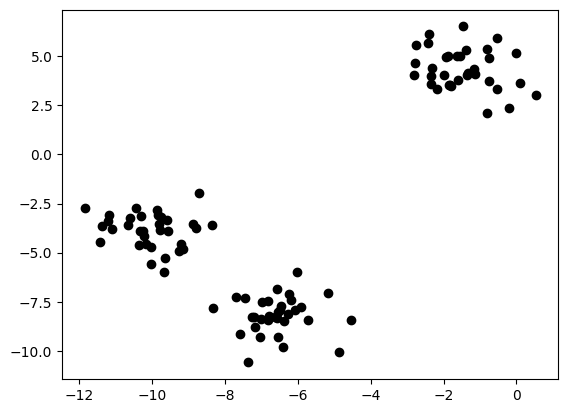

In [10]:
plt.scatter(X[:,0], X[:,1], color = "black")
plt.show()

In [11]:
kmeans = KMeans(init = "random", n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

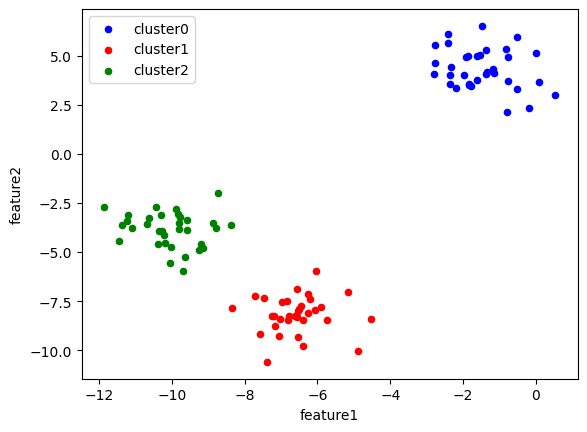

In [13]:
# 修正された pd.concat
merge_data = pd.concat([
    pd.DataFrame(X[:, 0], columns=["feature1"]),  # X の1列目
    pd.DataFrame(X[:, 1], columns=["feature2"]),  # X の2列目
    pd.DataFrame(y_pred, columns=["cluster"])     # クラスター情報
], axis=1)

# クラスターごとの散布図をプロット
ax = None
colors = ["blue", "red", "green"]
for i, data in merge_data.groupby("cluster"):
    ax = data.plot.scatter(x="feature1", y="feature2", color=colors[i], label="cluster" + str(i), ax=ax)

plt.show()

In [14]:
import requests,zipfile
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [15]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
print("データの大きさを確認")
print(bank.shape)
print("欠損値の確認")
print(bank.isnull().sum().sum())

(45211, 17)
0


In [19]:
from sklearn.preprocessing import StandardScaler
bank_sub = bank[["age", "balance","campaign","previous"]]

scaler = StandardScaler()
scaler.fit(bank_sub)

bank_sub_std = scaler.transform(bank_sub)

In [20]:
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [22]:
kmeans = KMeans(init="random", n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)

# クラスタ番号をシリーズとして作成
labels = pd.Series(kmeans.labels_, name="cluster_number")

In [ ]:
ax.